In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Activation, BatchNormalization, UpSampling2D, Input
from keras import applications
import pandas as pd

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_width, img_height = 256, 256

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'Trainers'
validation_data_dir = 'Images'
nb_train_samples = 6666
nb_validation_samples = 4105 
epochs = 50
batch_size = 16

In [3]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_train_klas.npy', 'wb'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation_klas.npy', 'wb'),
            bottleneck_features_validation)

In [67]:
datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
bottleneck_features_validation = model.predict_generator(
        generator)
np.save(open('bottleneck_features_validation_klas.npy', 'wb'),
            bottleneck_features_validation)

Found 4105 images belonging to 15 classes.


In [68]:
bottleneck_features_validation.shape

(4105, 4, 4, 512)

In [ ]:

model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), input_shape=y_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.fit(y_train, train_labels,
              epochs=100)

In [97]:
def train_top_model():
    train_data = np.load(cz)
    train_labels = pd.get_dummies(np.array(
        [0] * (4018) + [1] * (1241) + [2]*1867 + [3]*4901 + [4]*1028 + [5]*839 + [6]*1953 + [7]*3559 + [8]*4601 + [9]*385 + 
        [10]*2953 + [11]*1532 + [12]*8384 + [13]*372 + [14]*3607)).values

    validation_data = np.load(open('bottleneck_features_validation_klas.npy', 'rb'))
    validation_labels = pd.get_dummies(np.array(
        [0] * (404) + [1] * (111) + [2]*173 + [3]*473 + [4]*115 + [5]*80 + [6]*222 + [7]*365 + [8]*466 + [9]*39 + 
        [10]*289 + [11]*159 +[12]*808 + [13]*43 + [14]*358)).values

    model = Sequential()
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), input_shape=train_data.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
#     model.add(Flatten(input_shape=train_data.shape[1:]))
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(256, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=100,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)

In [182]:
train_labels = pd.get_dummies(np.array(
        [0] * (4018) + [1] * (1241) + [2]*1867 + [3]*4901 + [4]*1028 + [5]*839 + [6]*1953 + [7]*3559 + [8]*4601 + [9]*385 + 
        [10]*2953 + [11]*1532 + [12]*8384 + [13]*372 + [14]*3607)).values


validation_labels = pd.get_dummies(np.array(
    [0] * (404) + [1] * (111) + [2]*173 + [3]*473 + [4]*115 + [5]*80 + [6]*222 + [7]*365 + [8]*466 + [9]*39 + 
    [10]*289 + [11]*159 +[12]*808 + [13]*43 + [14]*358)).values

In [20]:
save_bottlebeck_features()


Found 41240 images belonging to 15 classes.
Found 4105 images belonging to 15 classes.


ValueError: Error when checking target: expected dense_6 to have shape (1,) but got array with shape (15,)

In [98]:
train_top_model()

Train on 41240 samples, validate on 4105 samples
Epoch 1/100
41240/41240 [==============================] - 49s 1ms/step - loss: 1.7775 - acc: 0.4384 - val_loss: 1.6061 - val_acc: 0.4899
Epoch 2/100
41240/41240 [==============================] - 47s 1ms/step - loss: 1.5223 - acc: 0.5143 - val_loss: 1.5639 - val_acc: 0.5082
Epoch 3/100
41240/41240 [==============================] - 46s 1ms/step - loss: 1.4074 - acc: 0.5489 - val_loss: 1.5630 - val_acc: 0.5099
Epoch 4/100
41240/41240 [==============================] - 47s 1ms/step - loss: 1.3303 - acc: 0.5703 - val_loss: 1.5560 - val_acc: 0.5123
Epoch 5/100
41240/41240 [==============================] - 51s 1ms/step - loss: 1.2590 - acc: 0.5940 - val_loss: 1.6103 - val_acc: 0.5133
Epoch 6/100
41240/41240 [==============================] - 50s 1ms/step - loss: 1.2082 - acc: 0.6108 - val_loss: 1.6325 - val_acc: 0.5050
Epoch 7/100
41240/41240 [==============================] - 48s 1ms/step - loss: 1.1565 - acc: 0.6275 - val_loss: 1.6705 - v

In [25]:
input_img = Input(shape=(256, 256, 3))

x = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
autoencoder.save_weights('denemaweights.h5')

In [26]:
autoencoder.load_weights('denemaweights.h5')

In [28]:
autoencoder.load_weights('autoencoder_weights.h5')

ValueError: You are trying to load a weight file containing 1 layers into a model with 7 layers.

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None)

Found 41173 images belonging to 96 classes.


In [157]:
im = next(validation_generator)

In [162]:
im[2,:,:,:].shape

(256, 256, 3)

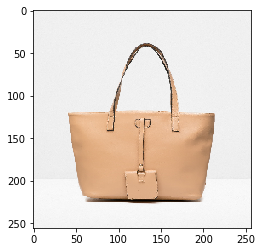

In [163]:
plt.imshow(im[2,:,:,:])
plt.show()

In [29]:
im = np.load(open('128imag.npy', 'rb'))

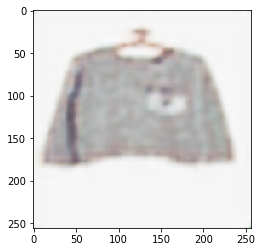

In [34]:
plt.imshow(im[3,:,:,:])
plt.show()

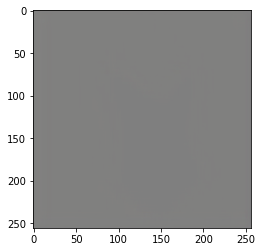

In [30]:
pre = autoencoder.predict(im[2,:,:,:].reshape(-1, 256, 256, 3))
plt.imshow(pre[0,:,:,:])
plt.show()

In [14]:
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None)

Found 4105 images belonging to 96 classes.


In [15]:
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)
        
validation_generator_ = fixed_generator(validation_generator)
train_generator_ = fixed_generator(train_generator)

In [21]:
autoencoder.fit_generator(
         fixed_generator(train_generator),
        epochs=0, steps_per_epoch=1288, shuffle=True,
        validation_data=fixed_generator(validation_generator), validation_steps=10)

In [173]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 8)         0         
__________

In [178]:
input_img = Input(shape=(256, 256, 3))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(15, activation='softmax')(x)
model = Model(input_img, x)
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 15)                3932175   
Total params: 3,932,623
Trainable params: 3,932,623
Non-trainable params: 0
_________________________________________________________________


In [188]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Found 41240 images belonging to 15 classes.
Found 4105 images belonging to 15 classes.


In [189]:
model.fit_generator(
         train_generator,
        epochs=10,  
        validation_data=validation_generator)

Epoch 1/10
 201/1289 [===>..........................] - ETA: 50:59 - loss: 1.7014

KeyboardInterrupt: 

In [215]:
model = applications.VGG16(include_top=False, weights='imagenet',  input_shape = (256,256,3))

x = model.output
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(96, activation='softmax', name='predictions')(x)

model2 = Model([model.input], x)
model2.compile(optimizer='adadelta', loss='binary_crossentropy')

In [216]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [217]:
model2.fit_generator(
         train_generator,
        epochs=10,  
        validation_data=validation_generator)

Epoch 1/10
   8/1289 [..............................] - ETA: 13:46:32 - loss: 1.5167

KeyboardInterrupt: 